In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HR_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


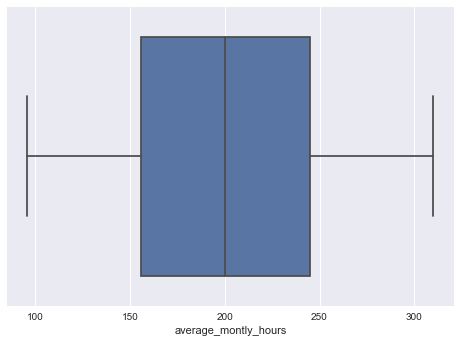

In [18]:
import seaborn as sns
#df.boxplot(column = 'average_montly_hours',showfliers = True)
sns.boxplot(df['average_montly_hours'],sym = 'k.')
plt.show()

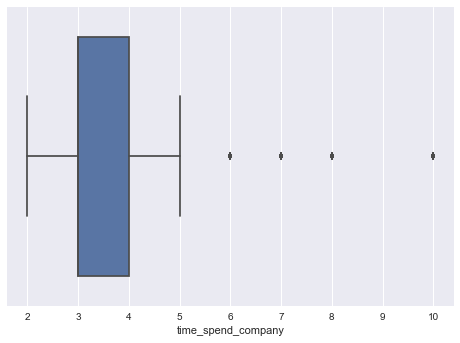

In [19]:
sns.boxplot(df['time_spend_company'],sym = 'k.')
plt.show()

In [40]:
#Convert variable tpye into numeric
df['salary'] = df['salary'].map({'low':1, 'medium':2, 'high':3})

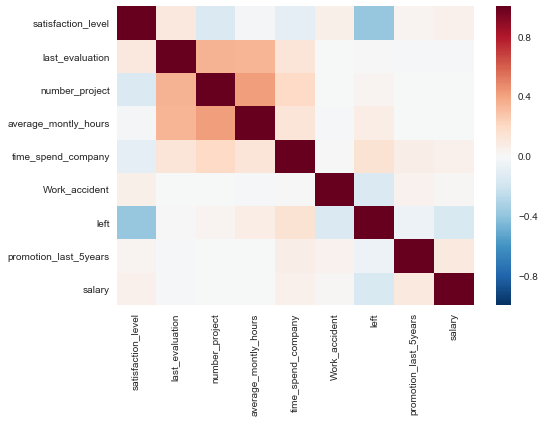

In [43]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

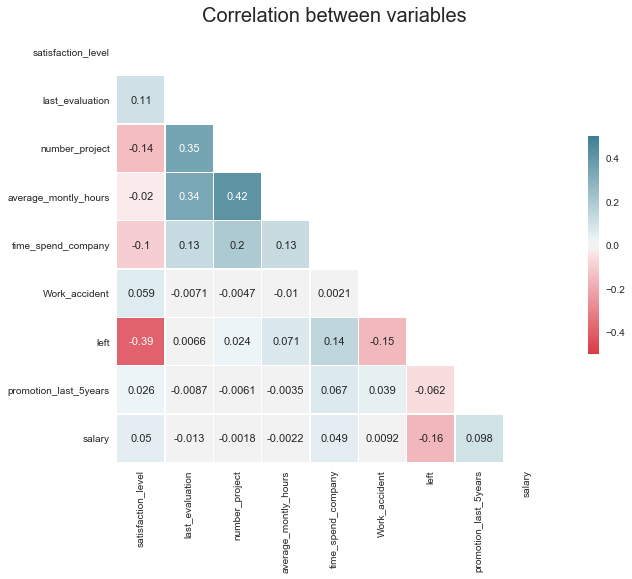

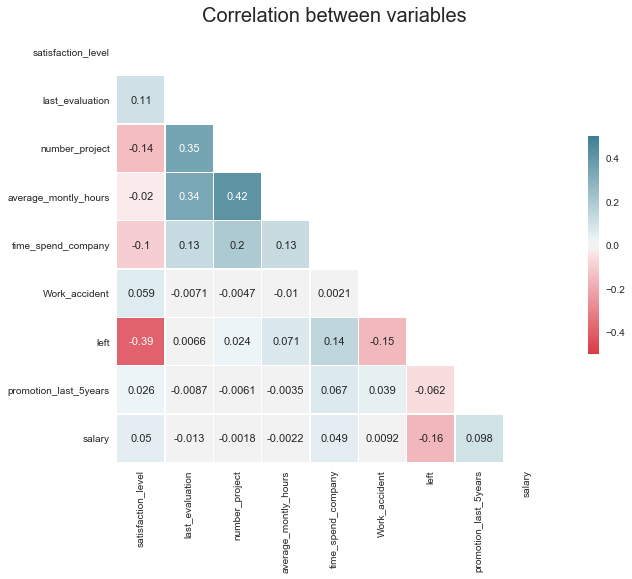

In [47]:
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);
plt.show()

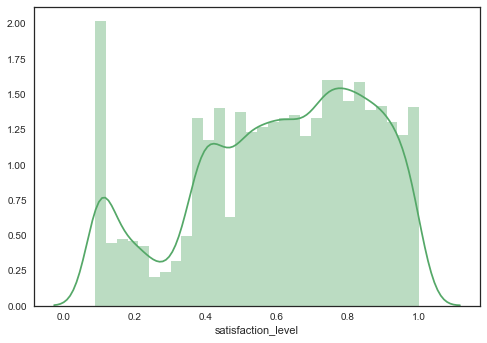

In [181]:
sns.distplot(df['satisfaction_level'])
plt.show()

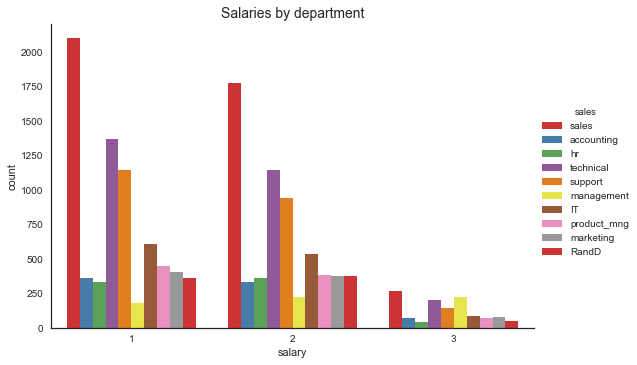

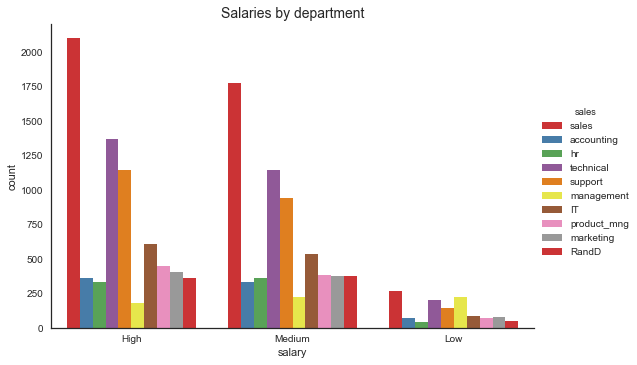

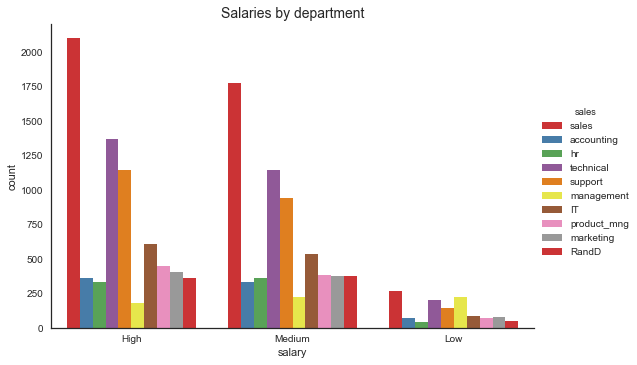

In [199]:
hist = sns.factorplot(x = 'salary', hue='sales', kind ='count', size = 5,aspect=1.5, data=df, palette='Set1' )
plt.title("Salaries by department", fontsize=14)
hist.set_xticklabels(['High', 'Medium', 'Low'])
plt.show()

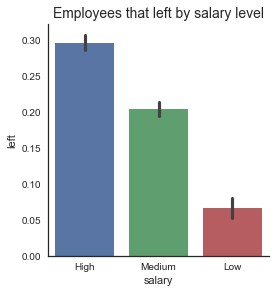

In [201]:
j = sns.factorplot(x='salary', y='left', kind='bar', data=df)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low'])
plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [52]:
# Input variables
x=df['satisfaction_level','last_evaluation','number_project','average_montly_hours',
          'time_spend_company','Work_accident','promotion_last_5years','salary']
#Output variables
y=df['left'] 

In [135]:
#Split dataset into training & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [137]:
#Modeling: Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

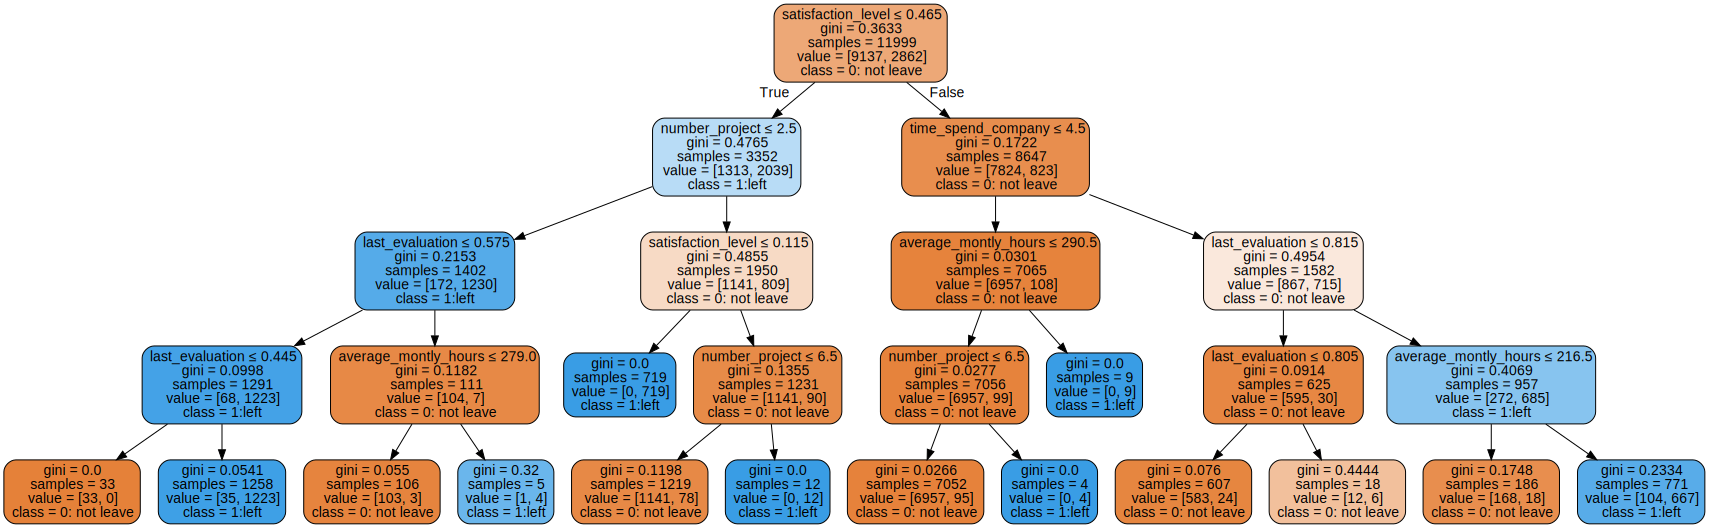

In [136]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = x.columns[:], 
                                class_names = ['0: not leave','1:left'],filled=True, 
                                rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

In [138]:
cross_val_score(clf, x_train, y_train, cv=10)

array([ 0.96086595,  0.96586178,  0.9725    ,  0.97916667,  0.96833333,
        0.9675    ,  0.97083333,  0.96330275,  0.97247706,  0.96830692])

In [139]:
#Decision Tree Accuracy
clf.score(x_train,y_train)

0.96966413867822321

In [140]:
clf.score(x_test,y_test)

0.96799999999999997

In [133]:
#cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy',cv = 10)
print('Accuracy per fold: ')
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.96086595  0.96586178  0.9725      0.97916667  0.96833333  0.9675
  0.97083333  0.96330275  0.97247706  0.96830692]
Average accuracy:  0.968914779918


In [131]:
#k-fold cross-validation
from sklearn.cross_validation import KFold
cv = KFold(n=len(x_train),n_folds = 10, random_state = 12)

fold_accuracy = []
for train_fold, test_fold in cv:
    train = x_train.loc[train_fold]
    test  = x_train.loc[test_fold]
    
    model = clf.fit(x_train,y_train)
    valid_acc = model.score(x_test, y_test)
    fold_accuracy.append(valid_acc)
    
print("Accuracy per fold: ",fold_accuracy,"\n")
print("Average accuracy: ",sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997, 0.96799999999999997] 

average accuracy:  0.968


In [144]:
#Predict y using the model and get confusion matrix
y_pred1 = clf.predict(x_test)
metrics.confusion_matrix(y_test, y_pred1)

array([[2250,   41],
       [  55,  654]])

In [150]:
matrics = pd.DataFrame({'Predict 0': [2250,55],'Predict 1':[41,654]})
matrics.rename(index = {0: 'True 0', 1: 'True 1'})

,Predict 0,Predict 1
True 0,2250,41
True 1,55,654


In [113]:
graph.render()

'Source.gv.pdf'

In [94]:
type(graph)

graphviz.files.Source

In [152]:
# Logistics Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
#predict y_test
y_pred2= logreg.predict(x_train)

In [165]:
#calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred2)

0.79564963746978912

In [169]:
#put in testing data
y_pred3= logreg.predict(x_test)
metrics.accuracy_score(y_test, y_pred3)

0.78833333333333333

In [170]:
metrics.confusion_matrix(y_test, y_pred3)

array([[2129,  162],
       [ 473,  236]])

In [166]:
matrics = pd.DataFrame({'Predict 0': [2129,162],'Predict 1':[473,236]})
matrics.rename(index = {0: 'True 0', 1: 'True 1'})

,Predict 0,Predict 1
True 0,2129,473
True 1,162,236


In [174]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred3)

'             precision    recall  f1-score   support\n\n          0       0.82      0.93      0.87      2291\n          1       0.59      0.33      0.43       709\n\navg / total       0.76      0.79      0.77      3000\n'